## Import library

In [13]:
import os
import random
import json

import tgt
import librosa
import soundfile as sf
import numpy as np
import pyworld as pw
import torch
import torchaudio
from pyannote.audio import Pipeline
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from scipy.io import wavfile
import matplotlib.pyplot as plt

import sys
sys.path.append(os.path.abspath('./'))

import audio as Audio
random.seed(1234)

import argparse

import yaml

In [ ]:
class Preprocessor:
    def __init__(self):
        self.sampling_rate = 22050
        self.hop_length = 256
        self.max_wav_value = 32768.0

        self.STFT = Audio.stft.TacotronSTFT(
            1024,
            256,
            1024,
            80,
            22050,
            0,
            8000,
        )

############################################
    def process_utterance(self, wav_path):

        # Read and trim wav files   
        wav, sr     = librosa.load(wav_path)
        
        wav         = wav.astype(np.float32)

        # Compute mel-scale spectrogram and energy
        mel_spectrogram, _ = Audio.tools.get_mel_from_wav(wav, self.STFT)
        
        wav, fs = sf.read(wav_path)
        if fs != self.sampling_rate:
            print('--- Check wav sample rate ---')
        tlen         = mel_spectrogram.shape[-1]
        frame_period = self.hop_length / self.sampling_rate * 1000
        f0, timeaxis = pw.dio(wav.astype('float64'), self.sampling_rate, frame_period=frame_period)
        f0           = pw.stonemask(wav.astype('float64'), f0, timeaxis, self.sampling_rate)
        f0           = f0[:tlen].reshape(-1).astype('float32')
        
        nonzeros_indices      = np.nonzero(f0)
        lf0                   = f0.copy()
        lf0[nonzeros_indices] = np.log(f0[nonzeros_indices]) # for f0(Hz), lf0 > 0 when f0 != 0
        plt.figure(figsize=(10, 4))
        plt.plot(timeaxis, lf0, label='F0')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.title('F0 Contour')
        plt.legend()
        plt.show()
        print(lf0[nonzeros_indices])

In [36]:
trim_wav_folder = '/home2/tuannd/tuanlha/PreprocessedData/preprocessed_data/trim_wav'
list_wav_path = [os.path.join(trim_wav_folder, f) for f in os.listdir(trim_wav_folder) if f.endswith('.wav')]
sample_wav = list_wav_path[0]

In [41]:
preprocessor = Preprocessor()

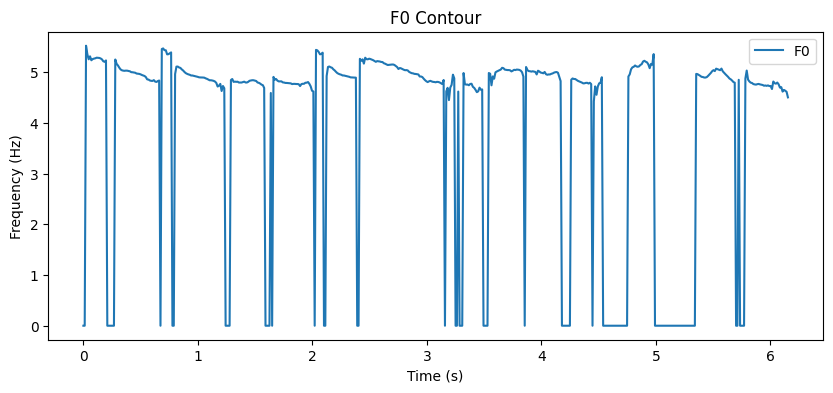

[5.518988  5.350073  5.2514906 5.309871  5.232301  5.25565   5.264932
 5.2715235 5.28301   5.280747  5.2778463 5.2677603 5.249044  5.212394
 5.2015195 5.228974  5.246763  5.161286  5.1299305 5.08684   5.051399
 5.03471   5.027469  5.0247555 5.0281954 5.027003  5.0217743 5.014603
 4.997865  4.995816  4.9912395 4.9861894 4.970829  4.9668317 4.963826
 4.955263  4.942064  4.931758  4.9223323 4.90059   4.8553224 4.851859
 4.8338842 4.8269763 4.825065  4.841058  4.8115687 4.8050003 4.8224444
 4.8327036 5.45376   5.465577  5.4306107 5.429755  5.3489714 5.352217
 5.370778  5.387135  4.960326  5.106906  5.1083755 5.090002  5.081347
 5.0525703 5.031502  5.0028253 4.9790616 4.9651275 4.9539533 4.9463477
 4.9323545 4.932085  4.9257393 4.918177  4.9131365 4.9054484 4.896262
 4.893775  4.8934965 4.892011  4.8889174 4.8754535 4.865871  4.8509607
 4.8378086 4.8381233 4.8333836 4.826136  4.8131747 4.7853603 4.7143497
 4.7319593 4.7663155 4.626518  4.724911  4.6808853 4.843499  4.8627763
 4.806539  4.81

In [42]:
preprocessor.process_utterance(sample_wav)

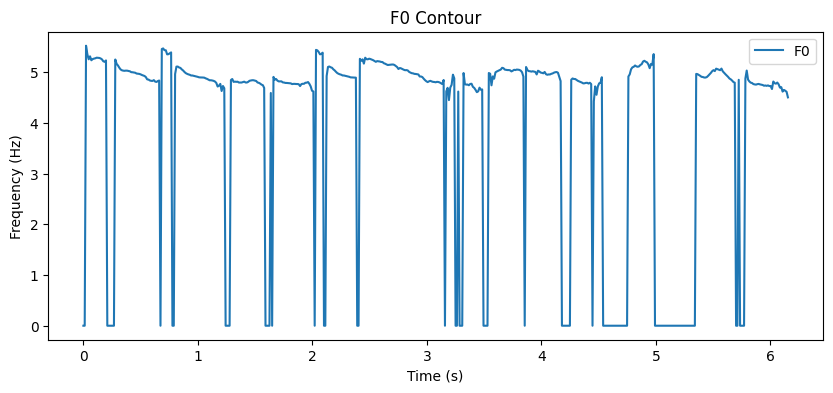

[5.518988  5.350073  5.2514906 5.309871  5.232301  5.25565   5.264932
 5.2715235 5.28301   5.280747  5.2778463 5.2677603 5.249044  5.212394
 5.2015195 5.228974  5.246763  5.161286  5.1299305 5.08684   5.051399
 5.03471   5.027469  5.0247555 5.0281954 5.027003  5.0217743 5.014603
 4.997865  4.995816  4.9912395 4.9861894 4.970829  4.9668317 4.963826
 4.955263  4.942064  4.931758  4.9223323 4.90059   4.8553224 4.851859
 4.8338842 4.8269763 4.825065  4.841058  4.8115687 4.8050003 4.8224444
 4.8327036 5.45376   5.465577  5.4306107 5.429755  5.3489714 5.352217
 5.370778  5.387135  4.960326  5.106906  5.1083755 5.090002  5.081347
 5.0525703 5.031502  5.0028253 4.9790616 4.9651275 4.9539533 4.9463477
 4.9323545 4.932085  4.9257393 4.918177  4.9131365 4.9054484 4.896262
 4.893775  4.8934965 4.892011  4.8889174 4.8754535 4.865871  4.8509607
 4.8378086 4.8381233 4.8333836 4.826136  4.8131747 4.7853603 4.7143497
 4.7319593 4.7663155 4.626518  4.724911  4.6808853 4.843499  4.8627763
 4.806539  4.81

In [38]:
preprocessor.process_utterance(sample_wav)